In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [5]:
len(x_train)

60000

In [6]:
len(x_test)

10000

In [7]:
x_train[0].shape

(28, 28)

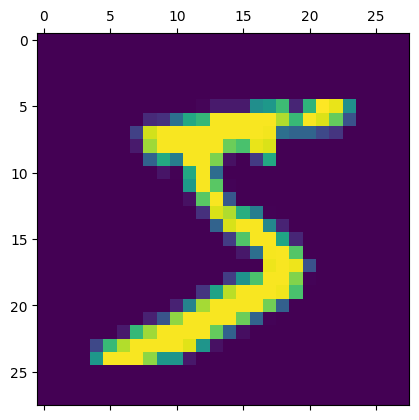

In [42]:
plt.matshow(x_train[0])

In [10]:
y_train[0]

5

In [11]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [13]:
#here we convert the (28,28) greed to one single dim array. (784)..
x_train.shape

(60000, 28, 28)

In [34]:
x_train = x_train/255
x_test = x_test/255

In [35]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)

In [36]:
# reshape the data (60000,784)
print(x_train_flattened.shape)
print(x_test_flattened.shape)

(60000, 784)
(10000, 784)


In [37]:
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [38]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation = 'sigmoid')
])
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4721 - accuracy: 0.8767
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3046 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2841 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2729 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2668 - accuracy: 0.9258


In [39]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2653 - accuracy: 0.9268


[0.26534929871559143, 0.926800012588501]

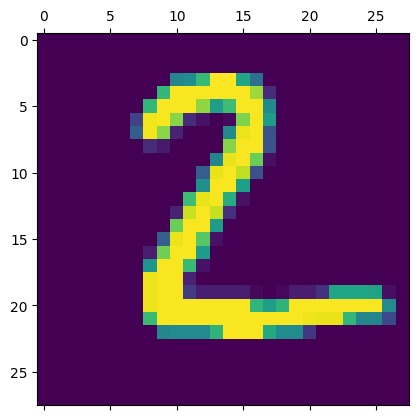

In [48]:
plt.matshow(x_test[1])

In [46]:
y_predicted = model.predict(x_test_flattened)
y_predicted[1]

313/313 [==============================] - 1s 2ms/step


array([1.8440986e-02, 2.9915302e-07, 5.6436431e-02, 9.5009398e-01,
       2.7767362e-03, 9.3660936e-02, 1.8111718e-06, 9.9972075e-01,
       9.5971070e-02, 6.8254906e-01], dtype=float32)

In [49]:
np.argmax(y_predicted[1])

2

In [51]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [52]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [53]:
cm = tf.math.confusion_matrix(labels = y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    1,    1,    0,    5,    9,    3,    2,    1],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   5,    9,  927,   18,    9,    3,   12,   11,   34,    4],
       [   2,    0,   18,  923,    1,   24,    2,   11,   20,    9],
       [   2,    1,    4,    1,  926,    0,    9,    3,   10,   26],
       [   9,    3,    3,   35,   11,  763,   19,    7,   34,    8],
       [  11,    3,    6,    1,    7,    9,  918,    2,    1,    0],
       [   1,    5,   24,    4,   10,    1,    0,  948,    3,   32],
       [   5,    7,    7,   15,    9,   20,   10,   13,  881,    7],
       [  10,    7,    1,   10,   32,    5,    0,   22,    8,  914]])>

Text(95.72222222222221, 0.5, 'true')

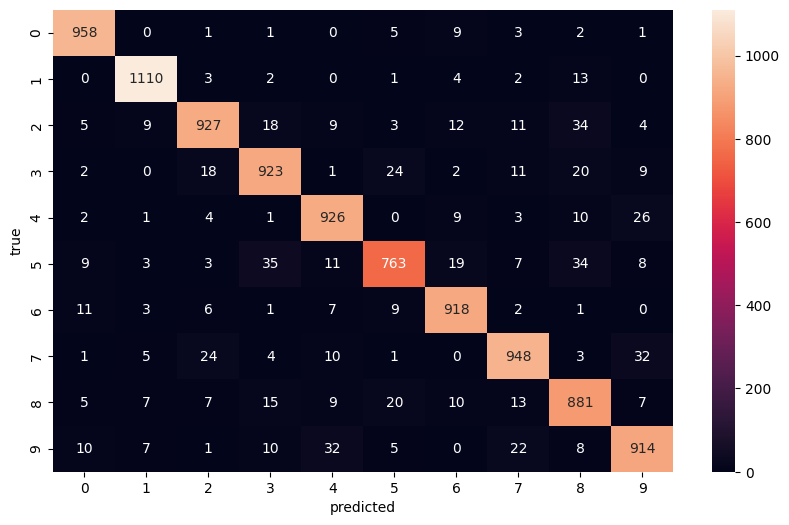

In [65]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot = True,fmt = 'd')
plt.xlabel('predicted')
plt.ylabel('true')

In [69]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2769 - accuracy: 0.9216
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1247 - accuracy: 0.9636
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0872 - accuracy: 0.9741
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0662 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0534 - accuracy: 0.9837


In [70]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0774 - accuracy: 0.9763


[0.07743863016366959, 0.9763000011444092]

313/313 [==============================] - 1s 3ms/step


Text(95.72222222222221, 0.5, 'true')

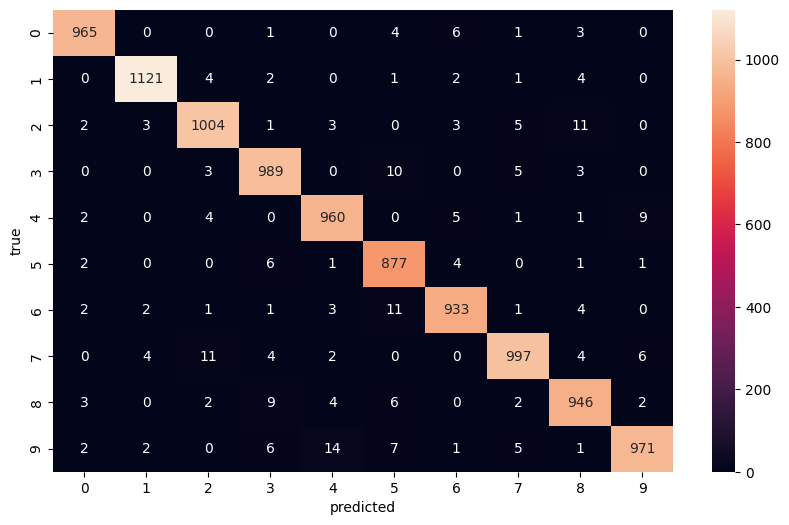

In [71]:
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels = y_test,predictions=y_predicted_labels)


import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot = True,fmt = 'd')
plt.xlabel('predicted')
plt.ylabel('true')

In [74]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2710 - accuracy: 0.9235
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1239 - accuracy: 0.9636
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0875 - accuracy: 0.9736
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0655 - accuracy: 0.9808
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0531 - accuracy: 0.9839
